 1.Importing the Dependencies

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date/time handling
import datetime as dt

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")


2. Data Loading and Understanding

In [2]:
import pandas as pd

# Chicago Crime dataset - pull from City of Chicago API
# Filtering: crimes from 2019 onwards (~5 years of data)
url = "https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$where=date>'2019-01-01T00:00:00'&$limit=500000"

# Read into pandas
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()



Dataset shape: (500000, 22)
Columns: ['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13969167,JJ417297,2025-09-17T00:00:00.000,075XX S STEWART AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,6.0,69.0,14,1174933.0,1854900.0,2025,2025-09-24T16:08:04.000,41.757230,-87.634462,"\n, \n(41.757229871, -87.634462025)"
1,13969743,JJ417953,2025-09-17T00:00:00.000,023XX S CALIFORNIA AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,25.0,30.0,07,1158063.0,1888370.0,2025,2025-09-24T16:08:04.000,41.849435,-87.695378,"\n, \n(41.849435421, -87.695377869)"
2,13969696,JJ418031,2025-09-17T00:00:00.000,014XX W NORTH AVE,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,OTHER COMMERCIAL TRANSPORTATION,False,False,...,27.0,24.0,04A,1166741.0,1910762.0,2025,2025-09-24T16:08:04.000,41.910699,-87.662887,"\n, \n(41.910699488, -87.662886582)"
3,13973819,JJ422976,2025-09-17T00:00:00.000,017XX E 72ND ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,7.0,43.0,26,1189209.0,1857587.0,2025,2025-09-24T16:08:04.000,41.764273,-87.582057,"\n, \n(41.764273074, -87.582057311)"
4,13970235,JJ418416,2025-09-17T00:00:00.000,072XX S CHAMPLAIN AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,6.0,69.0,08A,1181818.0,1857146.0,2025,2025-09-24T16:08:04.000,41.763237,-87.609160,"\n, \n(41.763236874, -87.609160462)"


In [3]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Quick check
df[['date', 'hour', 'day_of_week', 'month', 'year']].head()


,date,hour,day_of_week,month,year
0,2025-09-17,0,Wednesday,9,2025
1,2025-09-17,0,Wednesday,9,2025
2,2025-09-17,0,Wednesday,9,2025
3,2025-09-17,0,Wednesday,9,2025
4,2025-09-17,0,Wednesday,9,2025


Missing Values Overview

In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
location_description,2113
longitude,2090
latitude,2090
y_coordinate,2090
location,2090
x_coordinate,2090
ward,1
community_area,1
id,0
arrest,0


Exploratory Data Analysis (EDA)

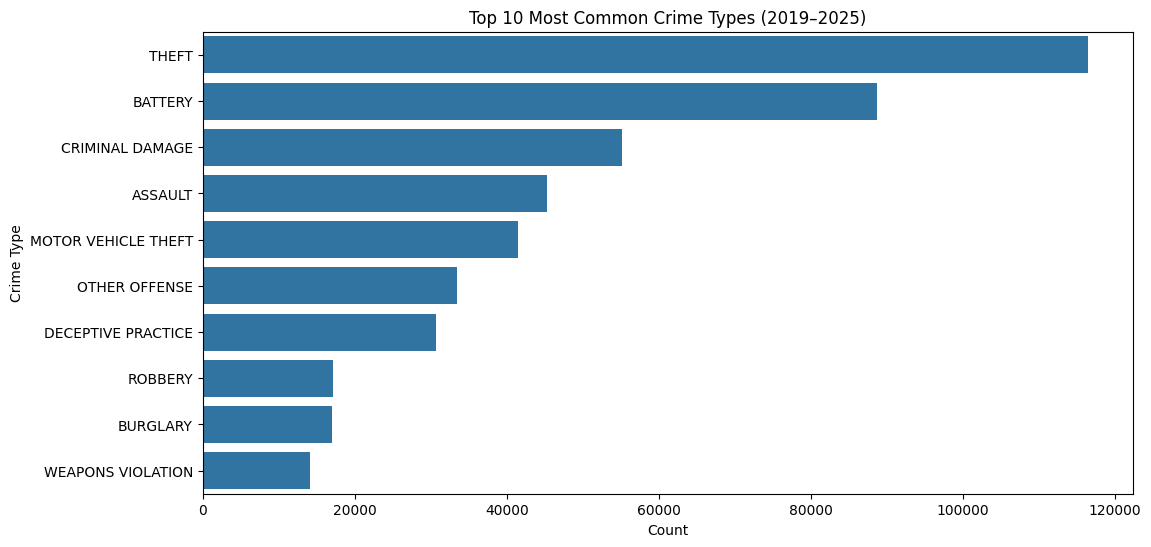

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='primary_type', order=df['primary_type'].value_counts().head(10).index)
plt.title("Top 10 Most Common Crime Types (2019–2025)")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


Crimes by year:

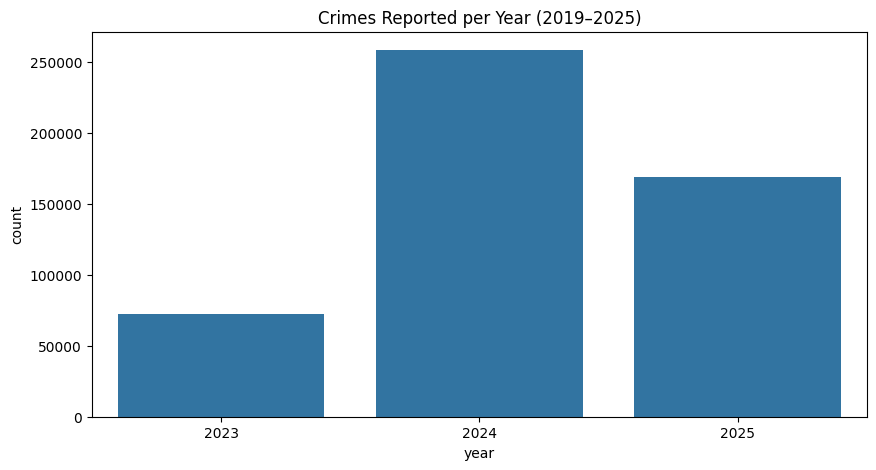

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year')
plt.title("Crimes Reported per Year (2019–2025)")
plt.show()


Crimes by day of week:

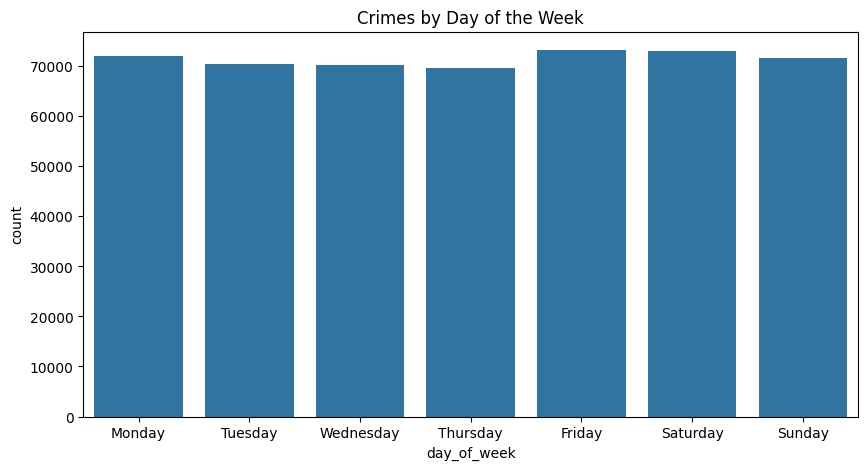

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_week',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Crimes by Day of the Week")
plt.show()


Define a “Hotspot”

In [8]:
# Count crimes by community area
crime_counts = df['community_area'].value_counts()

# Define hotspots as top 10% areas
threshold = crime_counts.quantile(0.90)
hotspots = crime_counts[crime_counts >= threshold].index

# Create hotspot label (1 = hotspot, 0 = not)
df['hotspot'] = df['community_area'].apply(lambda x: 1 if x in hotspots else 0)

df[['community_area','hotspot']].head()


,community_area,hotspot
0,69.0,0
1,30.0,0
2,24.0,1
3,43.0,1
4,69.0,0
